In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Downloading dataset

In [1]:
! wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2022-12-09 20:56:57--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 35735 (35K) [text/plain]
Сохранение в: «BostonHousing.csv»

BostonHousing.csv   100%[===================>]  34,90K  --.-KB/s    за 0,003s  

2022-12-09 20:56:58 (12,8 MB/s) - «BostonHousing.csv» сохранён [35735/35735]



### Exploring the data

In [4]:
! cat data/BostonHousing.csv

"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"
0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9
0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15
0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9
0.09378,12.5,7.87,"0",0.524,5.889,39,5.4509,5,3

In [5]:
df_boston_housing = pd.read_csv('data/BostonHousing.csv') # reading dataframe
df_boston_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
features = df_boston_housing.drop('medv', axis=1)
features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
target = pd.DataFrame(df_boston_housing['medv'])
target

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [9]:
features.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

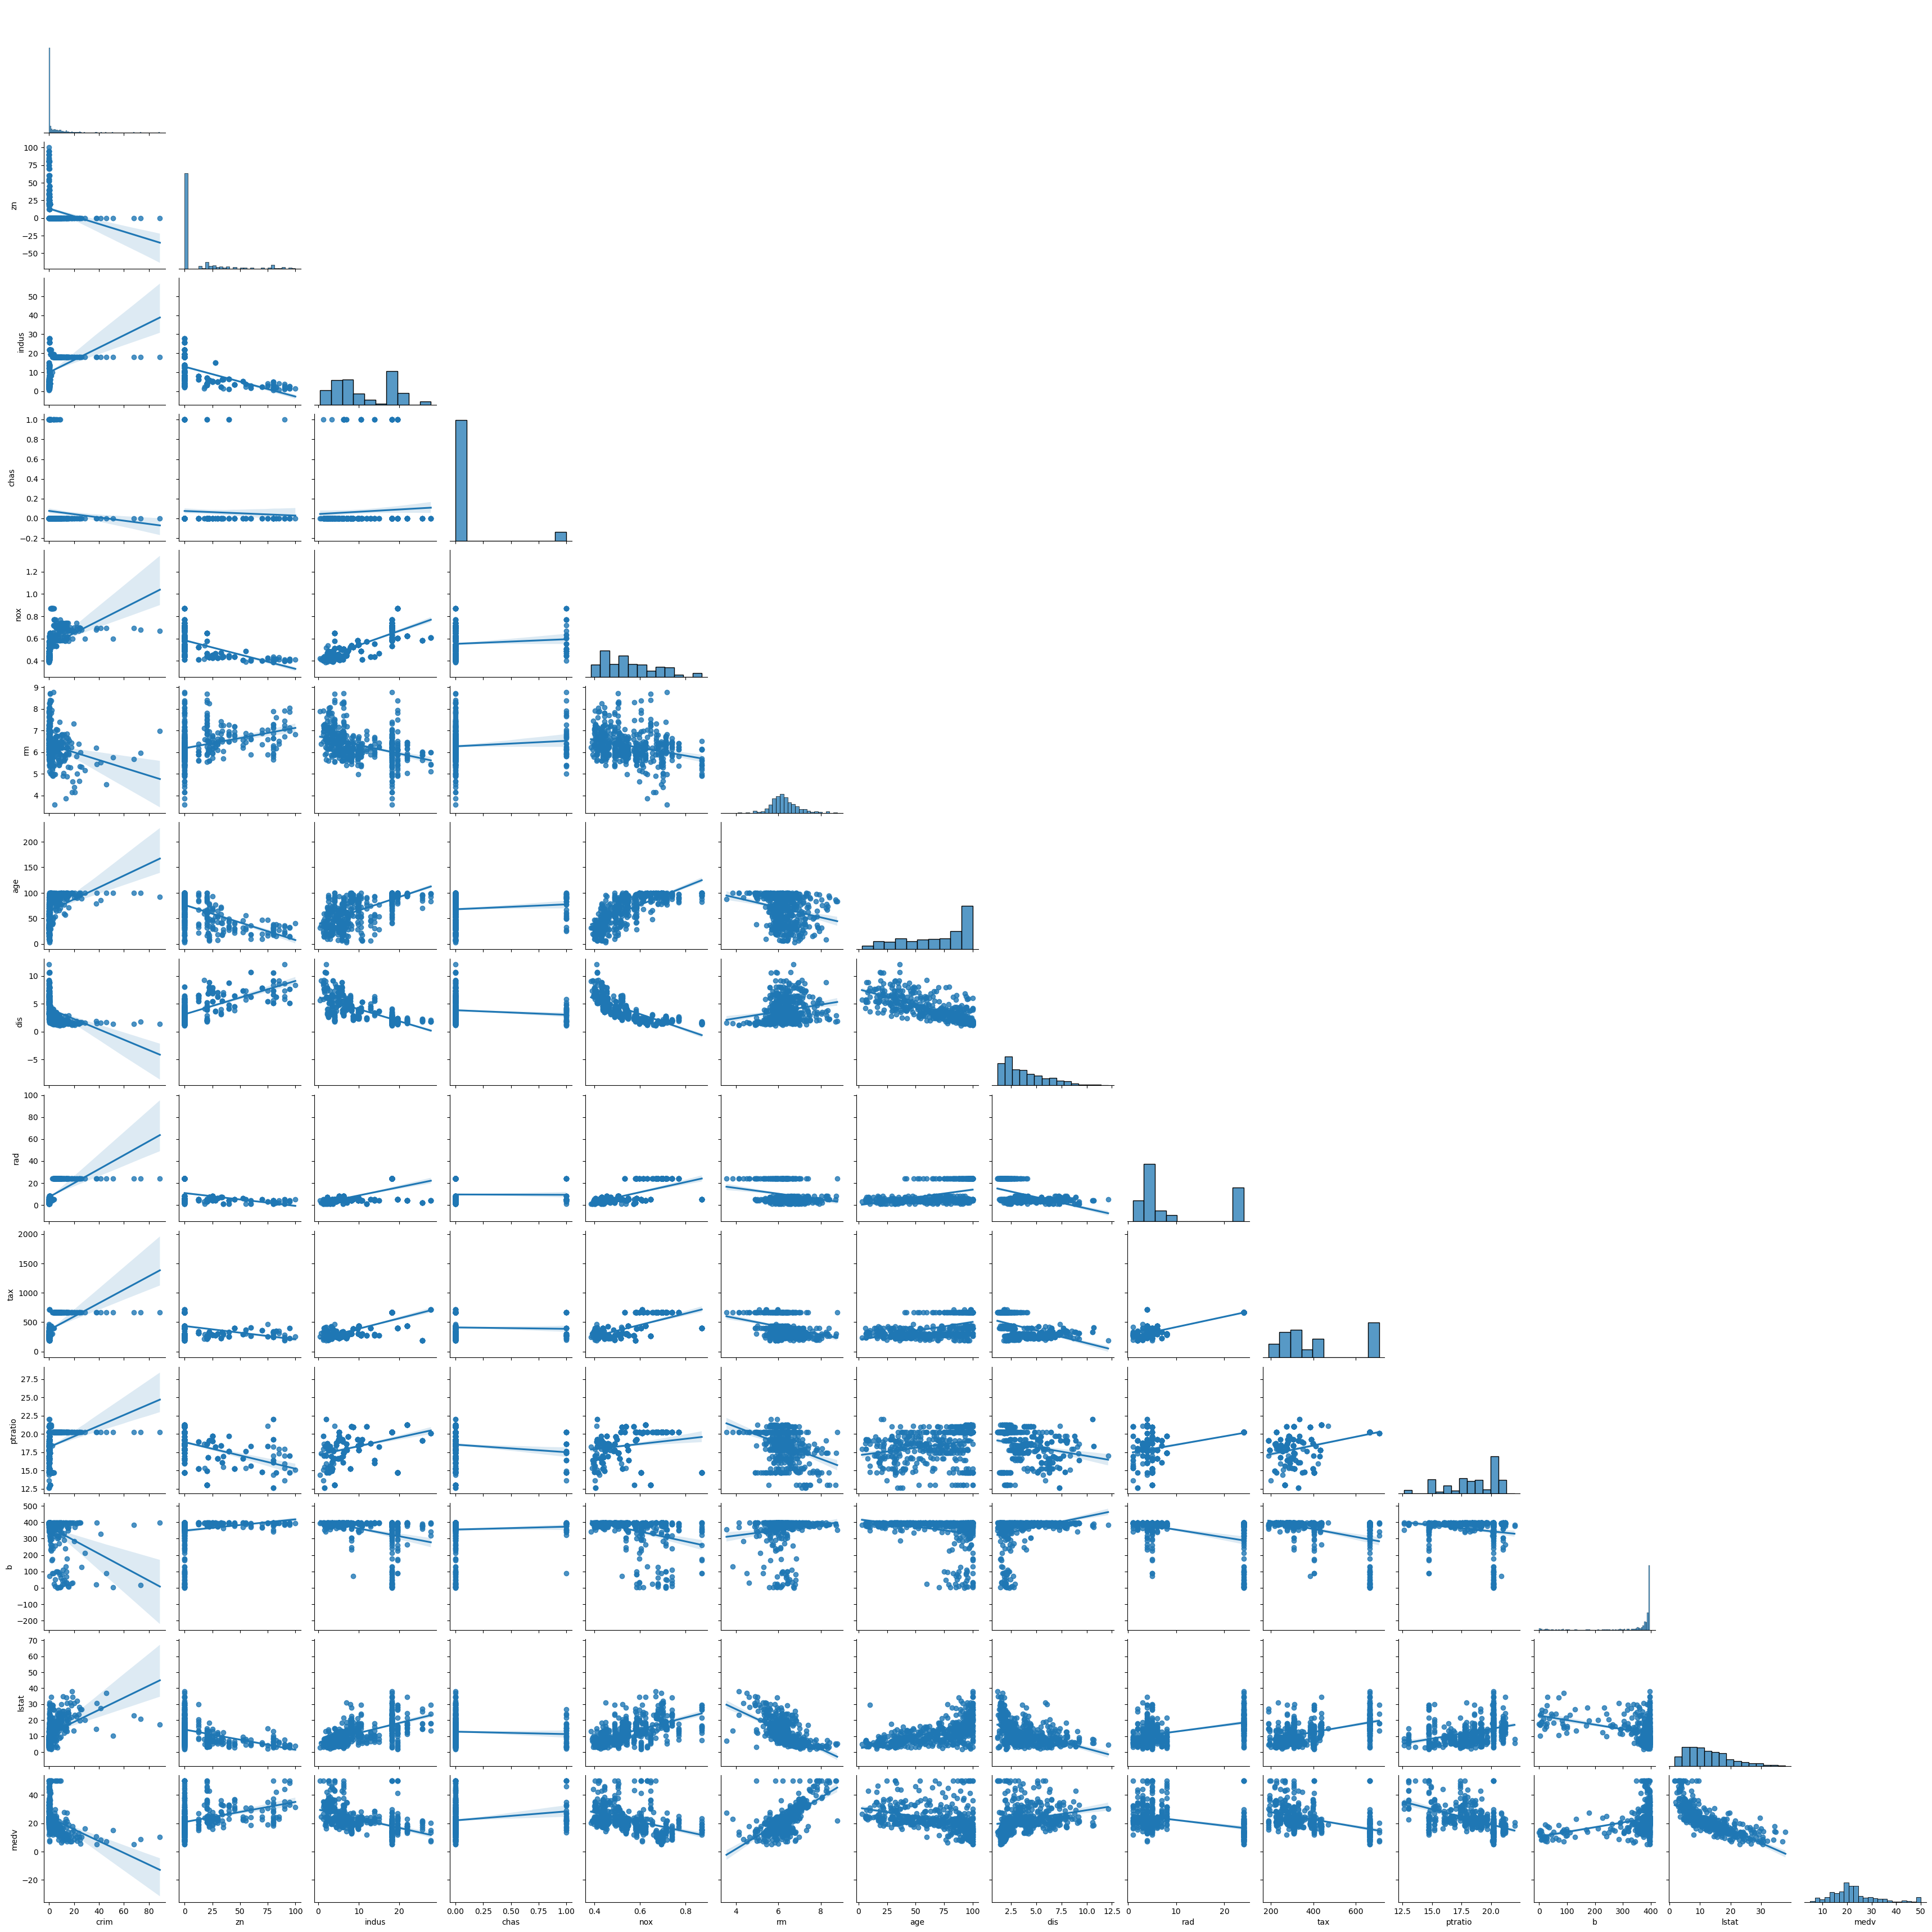

In [30]:
sns.pairplot(pd.concat([features, target], axis=1), kind="reg", corner=True);

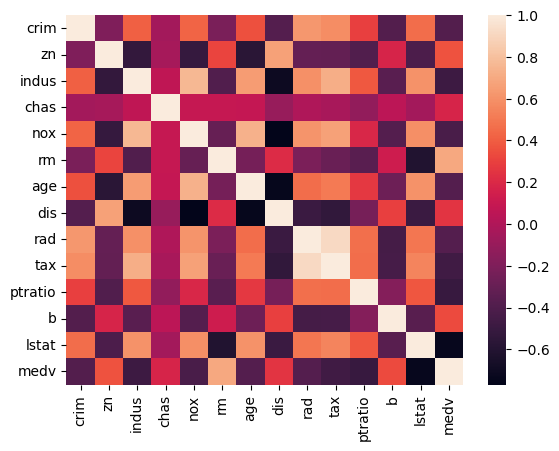

In [31]:
sns.heatmap(pd.concat([features, target], axis=1).corr());

### Standartization of the features

In [10]:
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [ ]:
X = sm.add_constant(scaled_features) # adding vector of constants to features

### Linear model construction

In [11]:
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        21:06:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

## Diagnostics of linear model

### a. Linear independence

In [27]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data

In [28]:
calculate_vif(X)

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


'tax' has the highest VIF -> let's try removing it:

In [26]:
model_updated = sm.OLS(target, X.drop(columns=['tax']))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.21e-133
Time:                        14:25:43   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.213    105.772      0.0

In [32]:
# recalculating VIF without 'tax':

calculate_vif(X.drop(columns=['tax']))

,feature,VIF
0,const,1.000000
1,crim,1.791940
2,zn,2.184240
3,indus,3.226015
4,chas,1.058220
5,nox,4.369271
6,rm,1.923075
7,age,3.098044
8,dis,3.954446
9,rad,2.837494


In [33]:
preds_full = results_scaled.get_prediction(X).predicted_mean
preds_updated = results_updated.get_prediction(X.drop(columns=['tax'])).predicted_mean

In [34]:
errors_full = target - preds_full
errors_updated = target - preds_updated

ValueError: Unable to coerce to Series, length must be 1: given 506

In [22]:
prediction_result = results_scaled.get_prediction(X)
target_pred = prediction_result.predicted_mean # predicting target values using constructed linear model

NameError: name 'results' is not defined

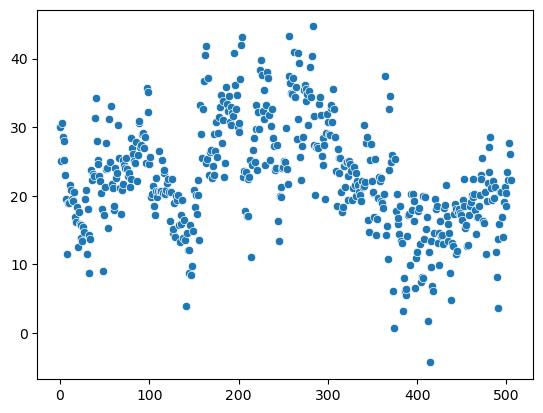

In [21]:
sns.scatterplot(target_pred);

In [16]:
resid_full = target - target_pred
sns.scatterplot(target_pred, resid_full)
plt.xlabel("Prediction")
plt.ylabel("Residual");

ValueError: Unable to coerce to Series, length must be 1: given 506